# Visualizations Aggregates Personas

## Content
- [Paths](#Paths)
- [Load data](#Load-data)
- [Population Pyramid](#Population-Pyramid)
- [Main cities](#Main-cities)

## Goal of visualization
- Show main visualitazions from aggregate data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
import re
from sodapy import Socrata
import configparser
import boto3
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%load_ext autoreload
%autoreload 2

In [3]:
os.chdir(os.path.join(os.getcwd(), ".."))

In [4]:
from src.config import metadata
from src.utils.s3_utils import (get_censo_paths, download_files_from_s3, read_multiple_csv,
                                mk_partitioned_dir, identified_partitioned_dir)
from src.utils.general_utils import create_dir

## Paths

In [11]:
config = configparser.ConfigParser()
config.read('aws.cfg')
aws = config["AWS"]
bucket = "censo-covid"
s3 = boto3.resource('s3',
                    region_name="us-west-2",
                    aws_access_key_id=aws['AWS_ACCESS_KEY_ID'],
                    aws_secret_access_key=aws['AWS_SECRET_ACCESS_KEY'])
s3_client = boto3.client('s3',
                         aws_access_key_id=aws['AWS_ACCESS_KEY_ID'],
                         aws_secret_access_key=aws['AWS_SECRET_ACCESS_KEY']
                        )

# Local paths
data_path = os.path.join(os.getcwd(), "data")
censo_data_path = os.path.join(data_path, "censo")
covid_path = os.path.join(os.getcwd(), "data", "covid.csv")
divipola_path = os.path.join(os.getcwd(), "data", "divipola.csv")
#complete_fallecidos_path = os.path.join(data_path, "complete_fallecidos") # Heavy downloads
#complete_personas_path = os.path.join(data_path, "complete_fallecidos") # Really heavy download
aggregates_path = os.path.join(data_path,'aggregates')
aggregates_personas_path = os.path.join(aggregates_path, 'personas')
aggregates_fallecidos_path = os.path.join(aggregates_path, 'fallecidos')
aggregates_covid_path = os.path.join(aggregates_path, 'covid')
joins_path = os.path.join(data_path,'joins')
joins_personas_path = os.path.join(joins_path, 'personas')
joins_fallecidos_path = os.path.join(data_path,'fallecidos')

# S3 paths
censo_covid_bucket_s3 = f"s3a://{bucket}"

raw_data_path_s3 = os.path.join(censo_covid_bucket_s3, "raw-data")
censo_data_path_s3 = os.path.join(raw_data_path_s3, "censo")
covid_tests_path_s3 = os.path.join(raw_data_path_s3, "covid-tests.csv")
covid_path_s3 = os.path.join(raw_data_path_s3, "covid.csv")
divipola_path_s3 = os.path.join(raw_data_path_s3, "divipola.csv")

final_data_path_s3 = os.path.join(censo_covid_bucket_s3, "final-data")
#complete_personas_path = os.path.join(final_data_path, "complete_personas")# Heavy downloads
#complete_fallecidos_path = os.path.join(final_data_path, "complete_fallecidos")# Really heavy download

aggregates_personas_path_s3 = os.path.join(final_data_path_s3, "aggregates_personas")
aggregates_fallecidos_path_s3 = os.path.join(final_data_path_s3, "aggregates_fallecidos")
aggregates_covid_path_s3 = os.path.join(final_data_path_s3, "aggregates_covid")

join_personas_covid_path_s3 = os.path.join(final_data_path_s3, "join_personas_covid")
join_fallecidos_covid_path_s3 = os.path.join(final_data_path_s3, "join_fallecidos_covid")

s3Bucket = s3.Bucket(bucket)

# Load data

In [12]:
create_dir(aggregates_personas_path)

/Users/camilovelasquez/Desktop/Documents/Camilo/Udacity/censo_covid_colombia/data/aggregates/personas dir exists


In [154]:
download_files_from_s3(aggregates_personas_path, s3Bucket,
                       prefix=aggregates_personas_path_s3.replace(censo_covid_bucket_s3 + "/", ""))

Downloading... _SUCCESS
Downloaded:  /Users/camilovelasquez/Desktop/Documents/Camilo/Udacity/censo_covid_colombia/data/aggregates/personas/_SUCCESS
Downloading... part-00000-928c2f6b-fe3c-4939-a3be-2b0add219a2b.c000.csv
Downloaded:  /Users/camilovelasquez/Desktop/Documents/Camilo/Udacity/censo_covid_colombia/data/aggregates/personas/dpto=ANTIOQUIA/part-00000-928c2f6b-fe3c-4939-a3be-2b0add219a2b.c000.csv
Downloading... part-00000-928c2f6b-fe3c-4939-a3be-2b0add219a2b.c000.csv
Downloaded:  /Users/camilovelasquez/Desktop/Documents/Camilo/Udacity/censo_covid_colombia/data/aggregates/personas/dpto=ATLÁNTICO/part-00000-928c2f6b-fe3c-4939-a3be-2b0add219a2b.c000.csv
Downloading... part-00000-928c2f6b-fe3c-4939-a3be-2b0add219a2b.c000.csv
Downloaded:  /Users/camilovelasquez/Desktop/Documents/Camilo/Udacity/censo_covid_colombia/data/aggregates/personas/dpto=BOGOTÁ. D.C./part-00000-928c2f6b-fe3c-4939-a3be-2b0add219a2b.c000.csv
Downloading... part-00000-928c2f6b-fe3c-4939-a3be-2b0add219a2b.c000.csv


In [165]:
to_concat, list_files = read_multiple_csv(aggregates_personas_path, to_concat=[],
                                          list_of_files=[], header=0, n_files=10)

In [168]:
df = pd.concat(to_concat)
df.head()

,nom_mpio,Number_of_people,Avg_Number_people_per_home,Number_of_males,Number_of_females,Number_of_people_with_electricity,Number_of_people_without_electricity,Number_of_people_with_water_access,Number_of_people_without_water_access,Number_of_people_with_internet_access,Number_of_people_without_internet_access,Number_of_literate_people,Number_of_non_literate_people,Really_Good_health_service,Good_health_service,Bad_health_service,Really_Bad_health_service,Number_of_sons_out_of_country,VA1_ESTRATO_0,VA1_ESTRATO_1,VA1_ESTRATO_2,VA1_ESTRATO_3,VA1_ESTRATO_4,VA1_ESTRATO_5,VA1_ESTRATO_6,VA1_ESTRATO_9,P_NIVEL_ANOSR_1,P_NIVEL_ANOSR_2,P_NIVEL_ANOSR_3,P_NIVEL_ANOSR_4,P_NIVEL_ANOSR_5,P_NIVEL_ANOSR_6,P_NIVEL_ANOSR_7,P_NIVEL_ANOSR_8,P_NIVEL_ANOSR_9,P_NIVEL_ANOSR_10,P_NIVEL_ANOSR_99,P_EDADR_1,P_EDADR_2,P_EDADR_3,P_EDADR_4,P_EDADR_5,P_EDADR_6,P_EDADR_7,P_EDADR_8,P_EDADR_9,P_EDADR_10,P_EDADR_11,P_EDADR_12,P_EDADR_13,P_EDADR_14,P_EDADR_15,P_EDADR_16,P_EDADR_17,P_EDADR_18,P_EDADR_19,P_EDADR_20,P_EDADR_21,dpto
0,ARCABUCO,5465,3.860290,2729,2736,5396,51,4658,789,1303,4144,4770,292,14,577,126,12.0,141.0,9,520,4799,58,3,1,0,6,145,2288,913,863,132,5,200,261,66,178,28,386,424,495,531,414,434,353,383,358,333,309,283,213,180,142,108,67,37,13,2,0,BOYACÁ
1,CHITA,7778,4.053394,3988,3790,6689,1046,3872,3863,347,7332,6271,901,14,272,178,19.0,326.0,12,4727,1924,18,0,4,0,4,251,3523,1310,836,123,91,87,108,85,728,76,560,745,924,782,473,391,411,482,454,359,337,353,317,290,277,282,202,96,34,7,2,BOYACÁ
2,PAJARITO,1941,3.707772,1002,939,1858,72,1449,481,162,1758,1630,163,8,185,40,5.0,48.0,6,792,1018,30,0,0,6,6,42,751,303,325,70,7,69,63,26,134,19,132,152,159,174,162,152,131,124,132,129,104,102,87,57,60,34,34,9,6,1,0,BOYACÁ
3,PAYA,2061,4.366327,1099,962,689,1372,797,1264,62,1994,1652,245,3,113,5,1.0,163.0,13,221,438,2,7,0,0,8,57,904,337,248,37,5,60,37,12,197,8,159,194,208,241,181,166,144,130,139,118,90,69,63,57,45,29,17,6,4,1,0,BOYACÁ
4,CALDAS,3086,3.882982,1527,1559,3046,39,2051,1034,43,3041,2679,241,16,295,89,9.0,62.0,0,538,2484,23,0,0,0,1,51,1484,442,389,157,5,91,102,13,180,21,151,226,274,277,197,142,159,179,208,212,222,176,167,155,119,93,81,33,11,3,1,BOYACÁ


## Population Pyramid

In [169]:
P_EDADR_columns = [col for col in df.columns if "P_EDADR" in col]

In [170]:
mapping = {}
for val in P_EDADR_columns:
    number = int(val.split("_")[2])
    if number==21:
        mapping[val] = ">99"
    else:
        mapping[val] = f"{str((number-1)*5)}-{str((number-1)*5+4)}"

In [171]:
aux = df.groupby("dpto")[P_EDADR_columns].sum()

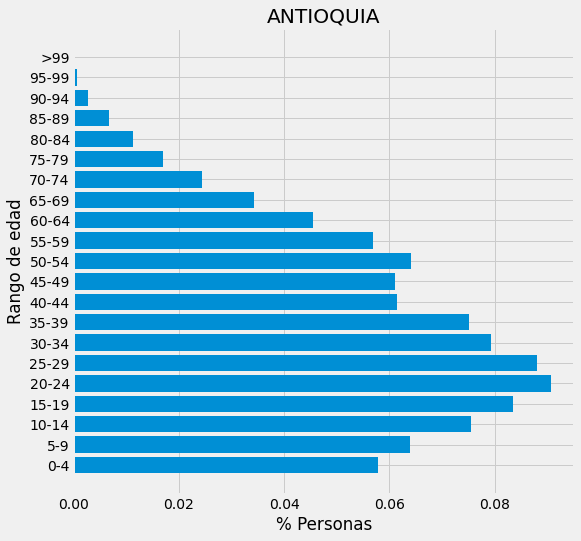

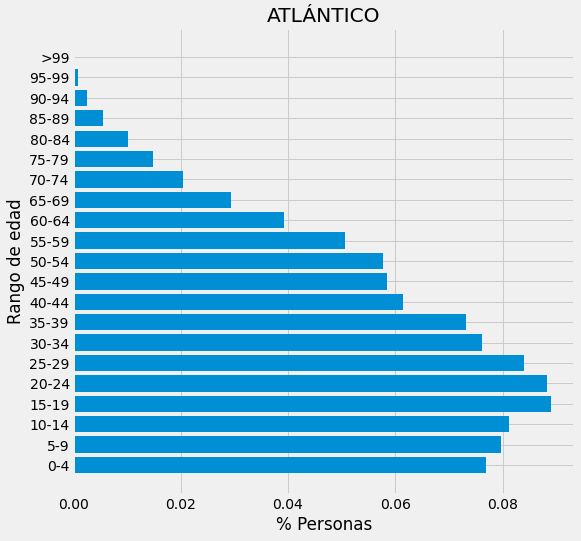

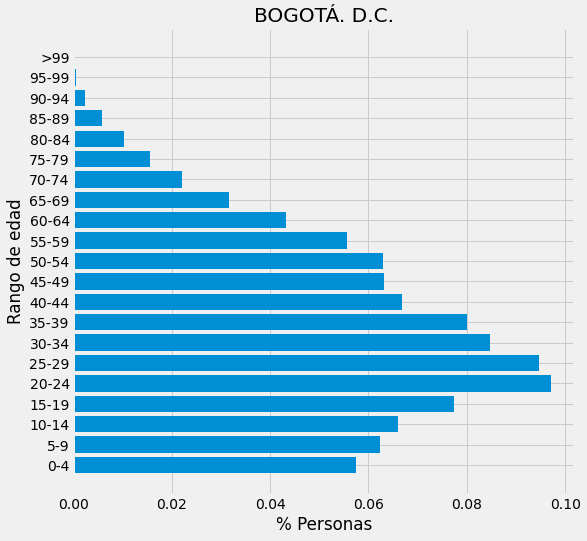

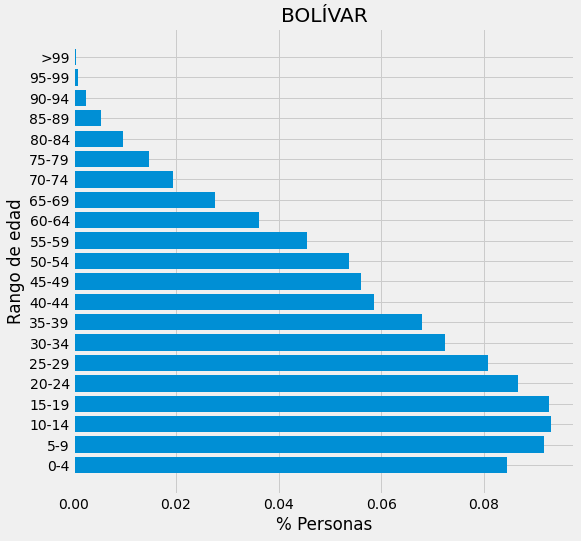

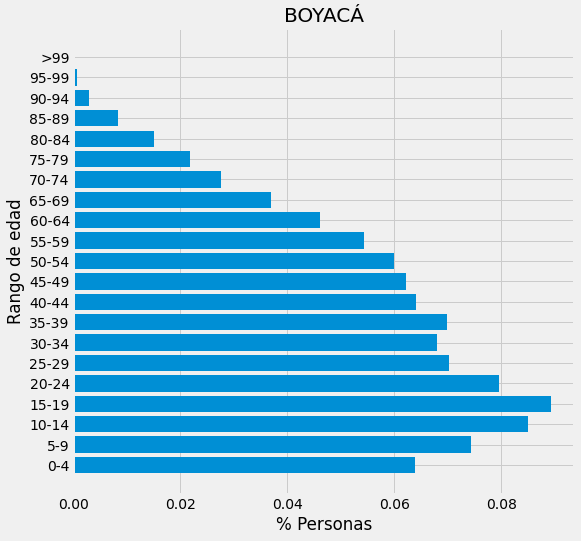

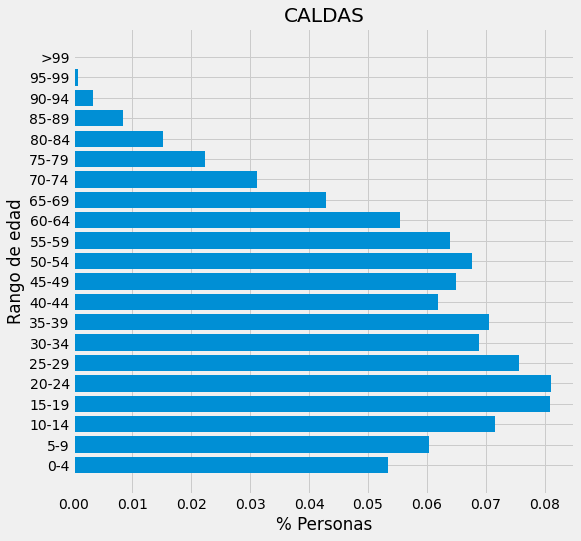

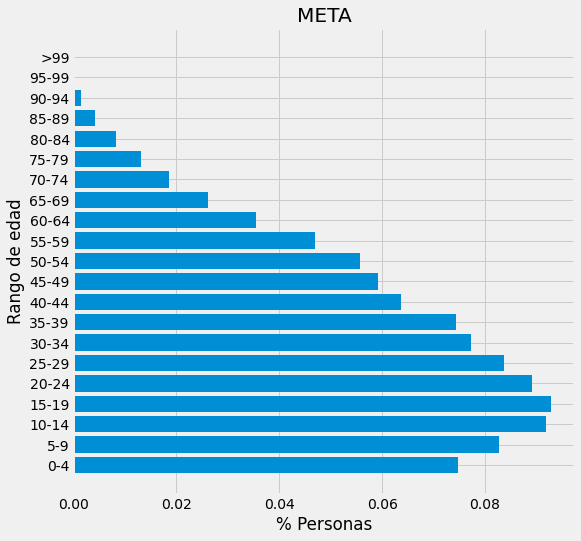

In [172]:
for dpto, series in aux.iterrows():
    fig, ax = plt.subplots(figsize=(8,8))
    ax.barh(series.index.map(mapping), series/series.sum())
    ax.set_ylabel("Rango de edad")
    ax.set_xlabel("% Personas")
    ax.set_title(dpto)
    plt.show()

### Health Service
Really_Good_health_service	Good_health_service	Bad_health_service	Really_Bad_health_service

In [173]:
health_columns = [col for col in df.columns if "health_service" in col]
df["sum_health"] = df[health_columns].sum(axis=1)
for col in health_columns:
    df["prop_" + col] = df[col]/df["sum_health"]

In [174]:
show_health_columns = ["dpto", "nom_mpio", 
                       "prop_Really_Good_health_service", "prop_Good_health_service", 
                       "prop_Bad_health_service", "prop_Really_Bad_health_service"]

In [179]:
print("BEST HEALTH SERVICE CITIES")
df[show_health_columns].sort_values("prop_Really_Good_health_service", ascending=False)[:5]

BEST HEALTH SERVICE CITIES


,dpto,nom_mpio,prop_Really_Good_health_service,prop_Good_health_service,prop_Bad_health_service,prop_Really_Bad_health_service
6,ATLÁNTICO,CAMPO DE LA CRUZ,0.572368,0.370066,0.052632,0.004934
11,CALDAS,MARULANDA,0.500000,0.461538,0.032967,0.005495
17,ANTIOQUIA,JERICÓ,0.432308,0.447692,0.075385,0.044615
23,ANTIOQUIA,ABRIAQUÍ,0.414634,0.520325,0.032520,0.032520
101,ANTIOQUIA,FRONTINO,0.388551,0.528624,0.068210,0.014616


In [180]:
print("GOOD HEALTH SERVICE CITIES")
df[show_health_columns].sort_values("prop_Good_health_service", ascending=False)[:5]

GOOD HEALTH SERVICE CITIES


,dpto,nom_mpio,prop_Really_Good_health_service,prop_Good_health_service,prop_Bad_health_service,prop_Really_Bad_health_service
3,BOYACÁ,PAYA,0.024590,0.926230,0.040984,0.008197
21,BOLÍVAR,MONTECRISTO,0.023418,0.925316,0.048734,0.002532
10,BOLÍVAR,ARROYOHONDO,0.069507,0.905830,0.020179,0.004484
66,BOYACÁ,ZETAQUIRA,0.022305,0.903346,0.066914,0.007435
103,BOYACÁ,SATIVASUR,0.080645,0.903226,0.008065,0.008065


In [181]:
print("BAD HEALTH SERVICE CITIES")
df[show_health_columns].sort_values("prop_Bad_health_service", ascending=False)[:5]

BAD HEALTH SERVICE CITIES


,dpto,nom_mpio,prop_Really_Good_health_service,prop_Good_health_service,prop_Bad_health_service,prop_Really_Bad_health_service
45,BOYACÁ,CHIVATÁ,0.017241,0.367816,0.413793,0.201149
86,BOYACÁ,BOAVITA,0.009788,0.564437,0.394780,0.030995
61,BOYACÁ,MONGUÍ,0.024561,0.470175,0.389474,0.115789
28,BOYACÁ,JERICÓ,0.014851,0.284653,0.383663,0.316832
44,BOYACÁ,VENTAQUEMADA,0.031671,0.529650,0.371294,0.067385


In [182]:
print("WORST HEALTH SERVICE CITIES")
df[show_health_columns].sort_values("prop_Really_Bad_health_service", ascending=False)[:5] 

WORST HEALTH SERVICE CITIES


,dpto,nom_mpio,prop_Really_Good_health_service,prop_Good_health_service,prop_Bad_health_service,prop_Really_Bad_health_service
28,BOYACÁ,JERICÓ,0.014851,0.284653,0.383663,0.316832
45,BOYACÁ,CHIVATÁ,0.017241,0.367816,0.413793,0.201149
40,BOYACÁ,NUEVO COLÓN,0.030252,0.458824,0.326050,0.184874
5,META,ACACÍAS,0.035914,0.478252,0.312450,0.173384
3,META,LA MACARENA,0.045852,0.531659,0.275109,0.147380


### Main cities

In [193]:
print("Most populated cities")
df[["dpto", "nom_mpio", "Number_of_people"]].sort_values("Number_of_people", ascending=False).head(20)

Most populated cities


,dpto,nom_mpio,Number_of_people
0,BOGOTÁ. D.C.,BOGOTÁ. D.C.,7181469
40,ANTIOQUIA,MEDELLÍN,2372330
2,ATLÁNTICO,BARRANQUILLA,1120103
18,BOLÍVAR,CARTAGENA DE INDIAS,887946
22,ATLÁNTICO,SOLEDAD,535984
64,ANTIOQUIA,BELLO,481901
17,META,VILLAVICENCIO,451212
19,CALDAS,MANIZALES,400436
55,ANTIOQUIA,ITAGÜÍ,263332
110,ANTIOQUIA,ENVIGADO,212437
